<span style="color:gray">Интеллектуальный анализ данных в R и Python. Лекция 3</span>

### 4.  Обучение с учителем. Регуляризация регрессионных моделей.

<font color='blue'>Регуляризацией</font> называют процесс ограничения сложности модели для достижения лучшей <font color='blue'>обобщающей способности</font>. Хорошая обобщающая способность модели предполагает лучшее предсказывание значений на тестовой выборке. Одним из способов управления сложностью модели является использование вектора-коэффициента $ \theta = (\theta_0, \dots, \theta_n) $.

Например, для нормы коэффициентов мы можем выбрать $ l_1 $, $ l_2 $ или их комбинацию с задачами оптимизации следующим образом:

* $l_1$-норма: $\underset{\theta}{min\,} { \frac{1}{2N} \|X \theta - y\|_2 ^ 2 + \lambda \|\theta\|_1}$ (Lasso регрессия, Лассо регрессия)
 
* $l_2$-норма: $\underset{\theta}{min\,} {{\| X \theta - y\|_2}^2 + \lambda {\|\theta\|_2}^2}$ (Ridge регрессия, ридж-регрессия, гребневая регрессия)

* Комбинация норм $l_1$ и $l_2$: $\underset{\theta}{min\,} { \frac{1}{2n_{samples}} \|X \theta - y\|_2 ^ 2 + \lambda \rho \|w\|_1 +
\frac{\lambda(1-\rho)}{2} \|\theta\|_2 ^ 2}$ (Elastic net регрессия)

где параметр регуляризации $ \lambda \geq 0 $ определяет силу регуляризации, а $ \rho $ задает долю нормы $ l_1 $ в регуляризации. Регрессия Лассо реализована в функции [`sklearn.linear_model.Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso), ридж-регрессия в [`sklearn.linear_model.Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge), и Elastic net в  [`sklearn.linear_model.ElasticNet`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet).

Проведем регуляризацию модели линейной регрессии (см. Лекция 1).

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression

In [16]:
# Загрузка набора diabetes dataset
diabetes = datasets.load_diabetes()
diabetes = pd.DataFrame(data=np.c_[diabetes['data'], diabetes['target']], 
                             columns=np.append(['X'+str(i) for i in range(len(diabetes['data'][0]))],'target'))

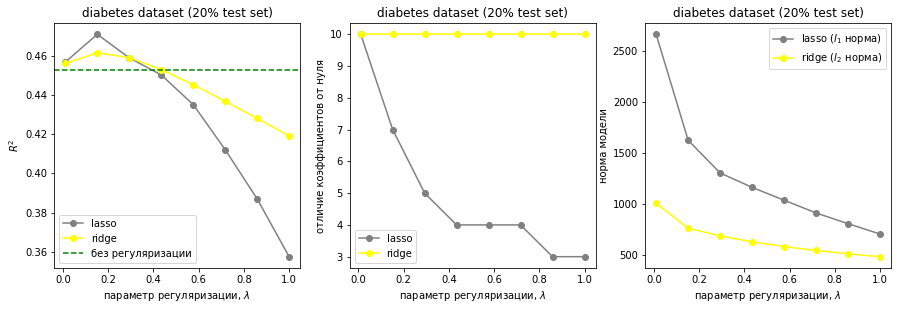

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4.5))

#lambda_array = np.linspace(0.01,1.0,20)
lambda_array = np.linspace(0.01,1.0,8) # измененный массив
R2_lasso = []
R2_ridge = []
n_coef_lasso = []
n_coef_ridge = []
norm_lasso = []
norm_ridge = []
norm_lasso1 = []
norm_ridge1 = []

for alpha in lambda_array:
    
    diabetes_train, diabetes_test = train_test_split(diabetes, test_size=0.20, random_state=42)

    model_lasso = Pipeline([('lasso', Lasso(alpha=alpha))])
    model_ridge = Pipeline([('ridge', Ridge(alpha=alpha))])
    
    model_lasso = model_lasso.fit(diabetes_train.drop('target',axis=1),diabetes_train['target'])
    model_ridge = model_ridge.fit(diabetes_train.drop('target',axis=1),diabetes_train['target'])

    R2_lasso.append(model_lasso.score(diabetes_test.drop('target',axis=1),diabetes_test['target']))
    R2_ridge.append(model_ridge.score(diabetes_test.drop('target',axis=1),diabetes_test['target']))
    
    n_coef_lasso.append(np.count_nonzero(model_lasso.named_steps['lasso'].coef_))
    n_coef_ridge.append(np.count_nonzero(model_ridge.named_steps['ridge'].coef_))
    
    norm_lasso.append(np.linalg.norm(model_lasso.named_steps['lasso'].coef_,ord=1))
    norm_ridge.append(np.linalg.norm(model_ridge.named_steps['ridge'].coef_,ord=2))

# построение модели без регуляриазции
model = Pipeline([('linear', LinearRegression())])
model = model.fit(diabetes_train.drop('target',axis=1),diabetes_train['target'])
diabetes_target_pred = model.predict(diabetes_test.drop('target',axis=1))
R2 = r2_score(diabetes_test['target'], diabetes_target_pred) 
    
ax[0].plot(lambda_array, R2_lasso, '-o', color='gray', label='lasso') 
ax[0].plot(lambda_array, R2_ridge, '-o', color='yellow', label='ridge') 
ax[1].plot(lambda_array, n_coef_lasso, '-o', color='gray', label='lasso') 
ax[1].plot(lambda_array, n_coef_ridge, '-o', color='yellow', label='ridge') 
ax[2].plot(lambda_array, norm_lasso, '-o', color='gray', label='lasso ($l_1$ норма)') 
ax[2].plot(lambda_array, norm_ridge, '-o', color='yellow', label='ridge ($l_2$ норма)') 

ax[0].axhline(R2, linestyle='--', color='green', label='без регуляризации')

ax[0].legend(loc='lower left')
ax[1].legend(loc='lower left')
ax[2].legend(loc='upper right')

ax[0].set(title='diabetes dataset (20% test set)', xlabel='параметр регуляризации, $\lambda$',ylabel='$R^2$')
ax[1].set(title='diabetes dataset (20% test set)', xlabel='параметр регуляризации, $\lambda$',ylabel='отличие коэффициентов от нуля')
ax[2].set(title='diabetes dataset (20% test set)', xlabel='параметр регуляризации, $\lambda$',ylabel='норма модели')

plt.show();

In [20]:
# коэффициенты модели при L1-регуляризации
for i in zip(diabetes.drop('target',axis=1).columns,model_lasso.named_steps['lasso'].coef_):
    print(i)

('X0', 0.0)
('X1', -0.0)
('X2', 413.43046820047056)
('X3', 34.835482630218884)
('X4', 0.0)
('X5', 0.0)
('X6', -0.0)
('X7', 0.0)
('X8', 258.151436481092)
('X9', 0.0)


In [21]:
# коэффициенты модели при L2-регуляризации
for i in zip(diabetes.drop('target',axis=1).columns,model_ridge.named_steps['ridge'].coef_):
    print(i)

('X0', 45.36685974491395)
('X1', -76.6663662408239)
('X2', 291.3382159172336)
('X3', 198.99801883156897)
('X4', -0.5304341249350863)
('X5', -28.57734738650284)
('X6', -144.51218613030403)
('X7', 119.25996024225762)
('X8', 230.22123208777256)
('X9', 112.14980967507206)


<font color='green'>Задание для самостоятельной работы:</font>

1. Построить модель линейной регрессии с регуляризацией на реальном наборе данных, запуская ячейки в данном Jupyter Notebook и меняя значения параметра регуляризации. 
1. Создать ячейку и написать пояснение, какое оптимальное значение параметра регуляризации для приведенных ваше рисунков и как значение данного параметра влияет на разряженность вектора коэффициентоа (определяется по )
количество наблюдений n_samples и разброс значений cluster_std влияет на качество бинарной классификации (centers=2). 
1. Загрузить результирующий .ipynb файл в папку /assignments/. Файлы должны именоваться как:<br>
   *'Lecture_3_' + surname*.

#### Оптимальное значение параметра регуляризации  
Для заданного вектора, из рисунка 1: оптимальное значение около 0.17 .
#### Влияние параметра регуляризации  
Исходя из рисунка 2: параметр не влияет на разряженность вектора в случае *ridge регрессии*, однако для *lasso регрессии* увеличение параметра увеличивает и разряженность.